# Follow-Me Project
Congratulations on reaching the final project of the Robotics Nanodegree! 

Previously, you worked on the Semantic Segmentation lab where you built a deep learning network that locates a particular human target within an image. For this project, you will utilize what you implemented and learned from that lab and extend it to train a deep learning model that will allow a simulated quadcopter to follow around the person that it detects! 

Most of the code below is similar to the lab with some minor modifications. You can start with your existing solution, and modify and improve upon it to train the best possible model for this task.

You can click on any of the following to quickly jump to that part of this notebook:
1. [Data Collection](#data)
2. [FCN Layers](#fcn)
3. [Build the Model](#build)
4. [Training](#training)
5. [Prediction](#prediction)
6. [Evaluation](#evaluation)

## Data Collection<a id='data'></a>
We have provided you with a starting dataset for this project. Download instructions can be found in the README for this project's repo.
Alternatively, you can collect additional data of your own to improve your model. Check out the "Collecting Data" section in the Project Lesson in the Classroom for more details!

In [1]:
import os
import glob
import sys
import tensorflow as tf

from scipy import misc
import numpy as np
from tensorflow import image
from utils import scoring_utils
from utils import data_iterator
from utils import plotting_tools 
from utils import model_tools
from segment_net.network import KerasWrapper
from segment_net.train import score_networks
from segment_net.flags import FLAGS

In [2]:
model = KerasWrapper(name='fcn', path='./ckpt/fcn/')

INFO:tensorflow:Restoring parameters from ./ckpt/fcn/segment-391


In [3]:
def eval_dir(name):
    sample_eval = './datasets/sample_evaluation_data'
    output_dir = './evaluation/fc_baseline'
    return os.path.join(sample_eval, name), os.path.join(output_dir, name)

The following cell will write predictions to files and return paths to the appropriate directories.
The `run_num` parameter is used to define or group all the data for a particular model run. You can change it for different runs. For example, 'run_1', 'run_2' etc.

In [4]:
val_with_targ, pred_with_targ = model_tools.tf_pred(model, *eval_dir('patrol_with_targ')) 
val_no_targ, pred_no_targ = model_tools.tf_pred(model, *eval_dir('patrol_non_targ')) 
val_following, pred_following = model_tools.tf_pred(model, *eval_dir('following_images'))

Now lets look at your predictions, and compare them to the ground truth labels and original images.
Run each of the following cells to visualize some sample images from the predictions in the validation set.

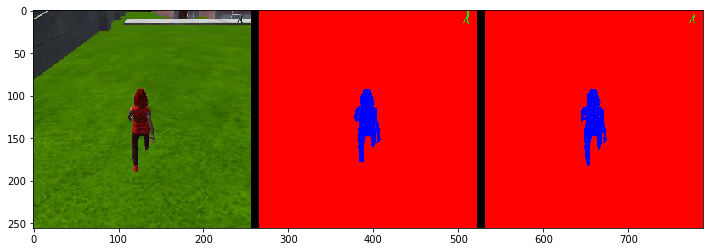

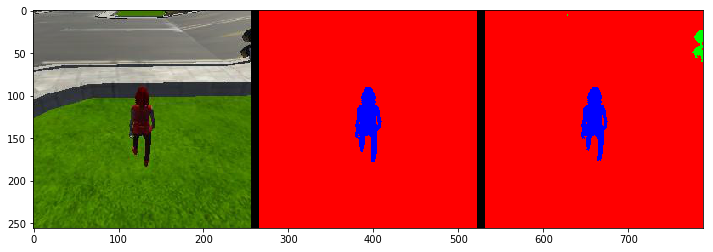

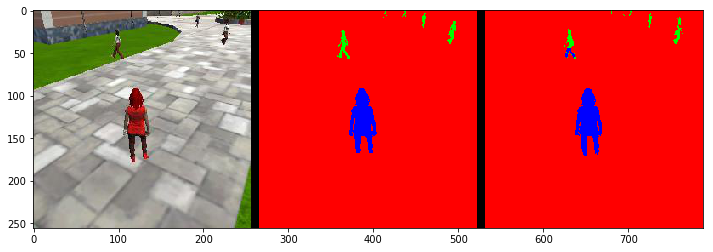

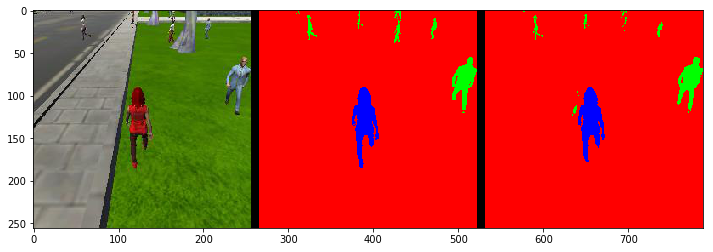

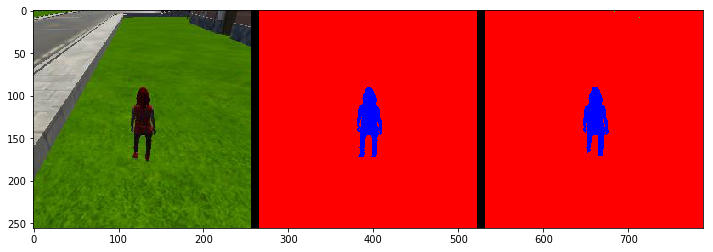

In [5]:
# images while following the target
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','following_images', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)
    

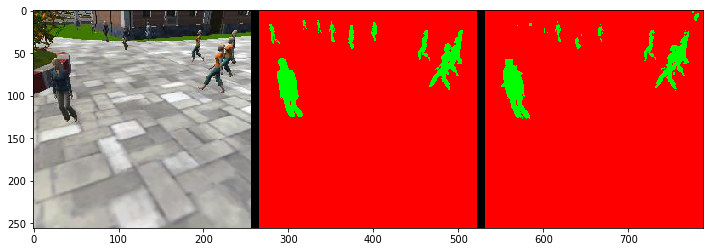

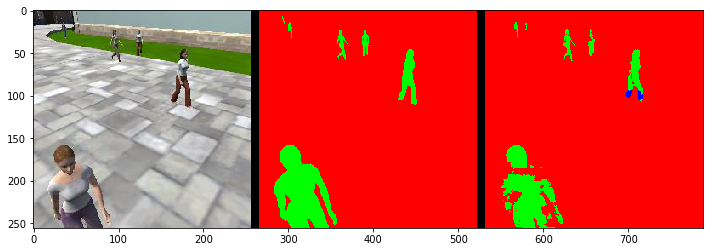

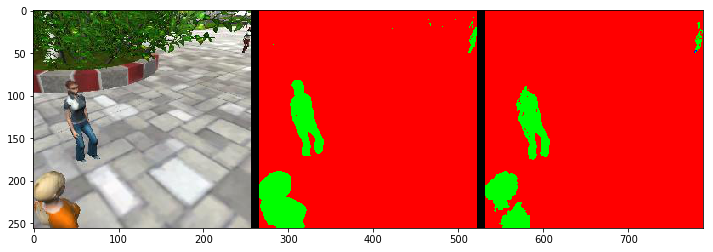

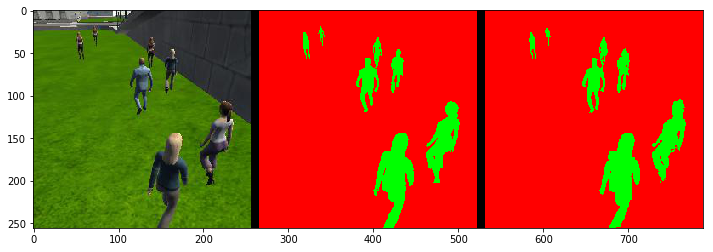

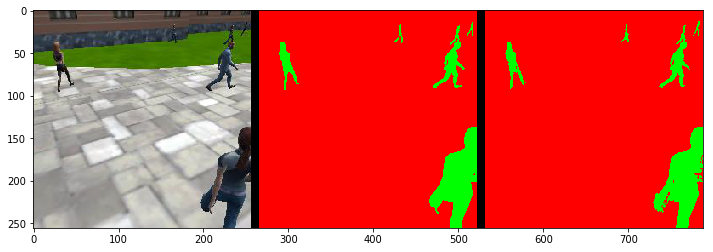

In [6]:
# images while at patrol without target
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','patrol_non_targ', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)

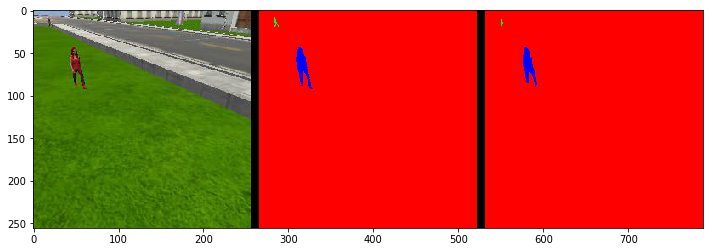

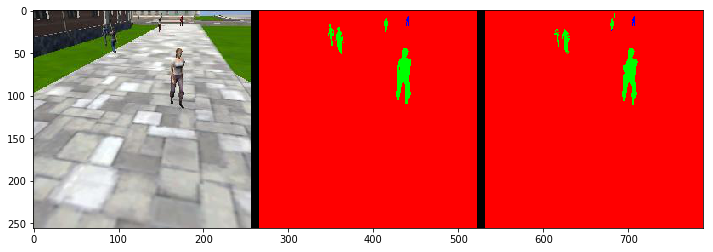

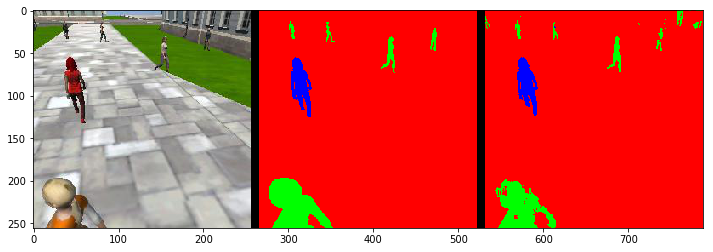

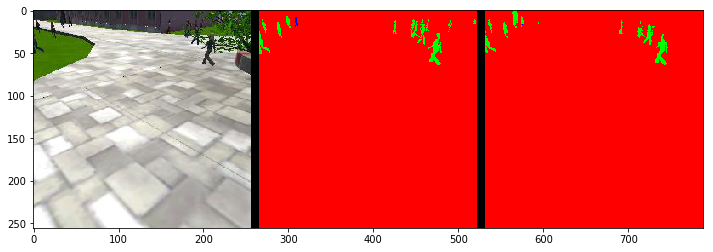

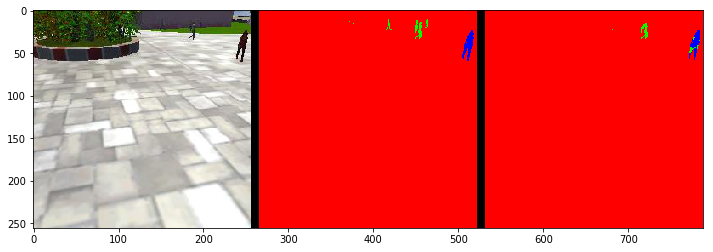

In [7]:
# images while at patrol with target
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','patrol_with_targ', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)

## Evaluation <a id='evaluation'></a>
Evaluate your model! The following cells include several different scores to help you evaluate your model under the different conditions discussed during the Prediction step. 

In [8]:
# Scores for while the quad is following behind the target. 
true_pos1, false_pos1, false_neg1, iou1 = scoring_utils.score_run_iou(val_following, pred_following)

number of validation samples intersection over the union evaulated on 542
average intersection over union for background is 0.9977225609605499
average intersection over union for other people is 0.4830456852533554
average intersection over union for the hero is 0.9537521447908632
number true positives: 539, number false positives: 0, number false negatives: 0


In [9]:
# Scores for images while the quad is on patrol and the target is not visable
true_pos2, false_pos2, false_neg2, iou2 = scoring_utils.score_run_iou(val_no_targ, pred_no_targ)

number of validation samples intersection over the union evaulated on 270
average intersection over union for background is 0.9924377953918597
average intersection over union for other people is 0.8452843746340322
average intersection over union for the hero is 0.0
number true positives: 0, number false positives: 96, number false negatives: 0


In [10]:
# This score measures how well the neural network can detect the target from far away
true_pos3, false_pos3, false_neg3, iou3 = scoring_utils.score_run_iou(val_with_targ, pred_with_targ)

number of validation samples intersection over the union evaulated on 322
average intersection over union for background is 0.9980257420149835
average intersection over union for other people is 0.594914089551463
average intersection over union for the hero is 0.4708265337755154
number true positives: 221, number false positives: 3, number false negatives: 91


In [11]:
# Sum all the true positives, etc from the three datasets to get a weight for the score
true_pos = true_pos1 + true_pos2 + true_pos3
false_pos = false_pos1 + false_pos2 + false_pos3
false_neg = false_neg1 + false_neg2 + false_neg3

weight = true_pos/(true_pos+false_neg+false_pos)
print(weight)

0.8


In [12]:
# The IoU for the dataset that never includes the hero is excluded from grading
final_IoU = (iou1 + iou3)/2
print(final_IoU)

0.712289339283


In [13]:
print(iou1, iou3)

0.953752144791 0.470826533776


In [14]:
# And the final grade score is 
final_score = final_IoU * weight
print(final_score)

0.569831471427
